In [22]:
!wget https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv

--2025-06-25 09:13:37--  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5912 (5.8K) [text/plain]
Saving to: ‘epa-sea-level.csv’

epa-sea-level.csv   100%[===================>]   5.77K  --.-KB/s    in 0s      

2025-06-25 09:13:37 (71.5 MB/s) - ‘epa-sea-level.csv’ saved [5912/5912]



In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

def draw_plot():
    # Read data from file
    df = pd.read_csv('epa-sea-level.csv')

    # Create scatter plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='blue', label='Data')

    # First line of best fit (full dataset)
    slope, intercept, _, _, _ = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
    x_future = pd.Series(range(df['Year'].min(), 2051))
    y_future = slope * x_future + intercept
    ax.plot(x_future, y_future, 'r-', label='Fit (1880-2050)')

    # Second line of best fit (2000 onward)
    df_recent = df[df['Year'] >= 2000]
    slope_recent, intercept_recent, _, _, _ = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])
    x_recent = pd.Series(range(2000, 2051))
    y_recent = slope_recent * x_recent + intercept_recent
    ax.plot(x_recent, y_recent, 'g-', label='Fit (2000-2050)')

    # Set labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Sea Level (inches)')
    ax.set_title('Rise in Sea Level')
    ax.legend()

    # Save and return the figure
    plt.savefig('sea_level_plot.png')
    return fig

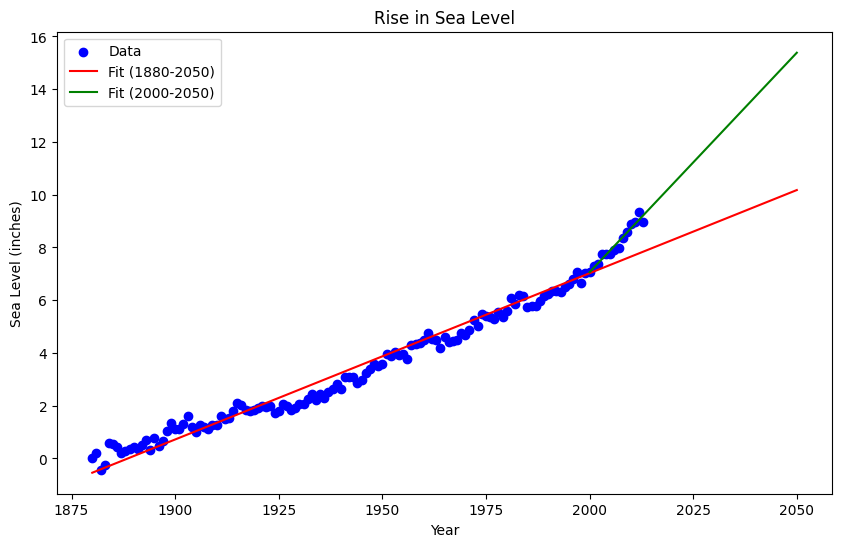

In [24]:
import matplotlib.pyplot as plt

# Test the function
fig = draw_plot()
plt.show()

Plot generated successfully!


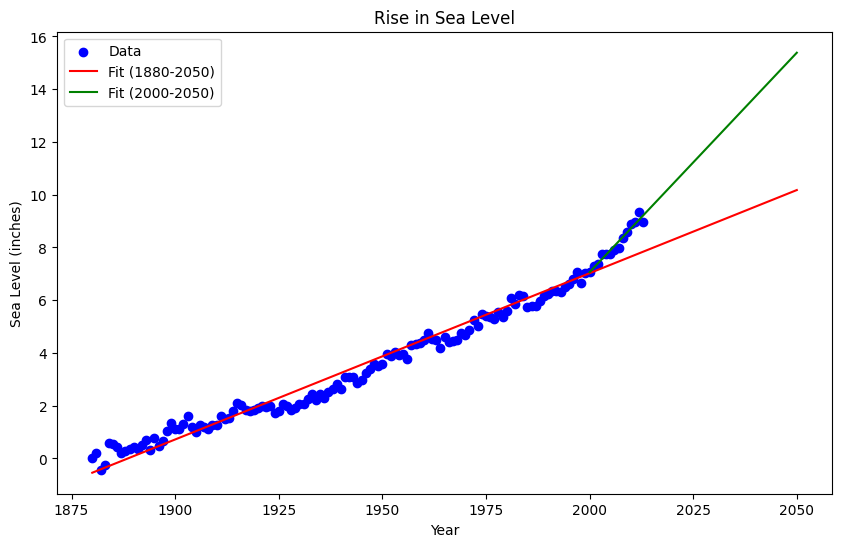

In [25]:
fig = draw_plot()
assert fig is not None, "Plot failed to generate"
print("Plot generated successfully!")
plt.show()